# Blackrock
## Investor Preference Data
First, let's import the necessary libraries and load the dataset. We will then conduct some basic exploratory data analysis (EDA) and visualize the data with various graphs. Finally, we will build a simple classification model using the dataset.

4: Savings accounts: These are low-risk investment options that offer modest interest rates. This category could be suitable for risk-averse investors, those with low financial knowledge, or short investment horizons.

3: Bonds: This category includes fixed-income investments such as government bonds, corporate bonds, and municipal bonds. These investments have a moderate risk profile and are suitable for investors with moderate risk tolerance and longer investment horizons.

2: Stock index funds: These are passive investment products that track the performance of a stock market index. They offer exposure to equities and have a higher risk profile compared to bonds. This category is suitable for investors with higher risk tolerance and longer investment horizons.

1: Actively managed mutual funds: These investment products are managed by professional portfolio managers who make investment decisions on behalf of the fund's investors. They can invest in a mix of assets such as stocks, bonds, and other financial instruments. This category could be suitable for investors with moderate to high risk tolerance and financial knowledge.

0: Alternative investments: This category includes investments such as hedge funds, private equity, real estate, and commodities. These investments often have a higher risk profile and require a more sophisticated understanding of financial markets. They are suitable for investors with high risk tolerance and financial knowledge.


In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report #Import scikit-learn metrics module for accuracy calculation

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/MyDrive/Colab Notebooks/FINA5240/Lecture1/'
path_folder = '/content/drive/MyDrive/Colab Notebooks/FINA5240/Lecture1/'

Mounted at /content/drive/
Blackrock_investor_data_2023.csv
python_mini_camp.ipynb
student_blackrock_investor_preference_workbook.ipynb


In [5]:
# Load the dataset
df = pd.read_csv(f'{path_folder}Blackrock_investor_data_2023.csv')
df.head()

,age,income,risk_tolerance,investment_horizon,financial_knowledge,employment_status,credit_score,debt_ratio,marital_status,children,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,product_preference
0,55.888091,40095.987963,9.525963,0.922363,2.315079,-0.012815,397.565605,0.680433,0.986619,0.835881,...,-9.748707,5.754892,-1.838510,2.151847,-1.295647,-10.005715,-2.629683,-0.420238,3.727918,4
1,68.868795,148819.247777,6.753186,0.854570,8.804488,0.966597,811.003991,0.192202,-0.018468,-0.020358,...,-10.141940,4.566641,0.482246,5.002176,5.679096,-9.976621,2.527501,2.921468,-6.309559,4
2,45.936452,138010.972571,8.495002,1.179817,0.456839,1.086470,590.405283,0.686478,0.948199,1.000277,...,-9.962944,2.668847,-2.413389,0.107714,2.411205,-10.044634,3.113050,-1.899597,-0.965299,4
3,31.989285,72105.009623,2.461419,1.330529,0.691942,-0.087853,520.420819,0.943931,0.054641,0.098695,...,-10.190714,-0.377570,-0.101114,1.286640,1.559466,-9.725749,-1.103064,-0.992874,1.311439,1
4,59.933366,138788.938314,5.815957,0.929997,9.290830,0.980841,301.678034,0.647651,1.065802,0.046385,...,-10.158632,1.642845,0.097248,3.605130,1.310303,-9.937359,2.635089,-2.460921,1.893226,4


In [6]:
# What features do we have?
df.columns

Index(['age', 'income', 'risk_tolerance', 'investment_horizon',
       'financial_knowledge', 'employment_status', 'credit_score',
       'debt_ratio', 'marital_status', 'children', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'product_preference'],
      dtype='object')

In [7]:
# Display dataset summary statistics
df.describe()

,age,income,risk_tolerance,investment_horizon,financial_knowledge,employment_status,credit_score,debt_ratio,marital_status,children,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,product_preference
count,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,...,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.000000,43536.00000
mean,43.519926,89894.464386,6.745126,5.436250,5.013447,0.499263,575.864889,0.628353,0.499004,1.245992,...,-9.999695,2.698794,-2.707061,1.164543,0.641080,-9.998494,1.681163,-1.027197,0.385302,3.36912
std,14.969397,34649.037664,2.731557,5.734532,2.889724,0.510683,158.749248,0.307391,0.509799,1.739263,...,0.140445,1.481430,2.977787,1.805737,1.664614,0.141785,2.503502,1.399338,1.680901,0.97661
min,17.680639,30014.967190,-0.091662,0.613449,-0.253113,-0.397325,299.825131,-0.314822,-0.360343,-0.369956,...,-10.572861,-2.653259,-10.335467,-6.903096,-6.855105,-10.645591,-9.454165,-6.161595,-7.944102,0.00000
25%,30.889142,59634.821086,4.529923,1.007740,2.503029,-0.000920,437.717593,0.398072,0.000483,-0.018272,...,-10.094073,1.665343,-4.620412,-0.056224,-0.433288,-10.094256,0.066924,-1.949117,-0.748588,3.00000
50%,43.117405,89810.033154,7.025744,1.972756,5.015803,0.480481,576.762459,0.651429,0.264741,0.104993,...,-9.999423,2.761792,-1.722688,1.212486,0.730696,-9.998308,1.656616,-1.161401,0.534876,4.00000
75%,56.155363,120042.357762,9.506111,9.083377,7.518997,0.999898,714.341992,0.887352,0.999556,2.236915,...,-9.905745,3.770216,-0.455348,2.448890,1.793893,-9.903561,3.343383,-0.285229,1.559521,4.00000
max,69.312822,150000.066139,10.422369,23.821773,10.283103,1.407342,849.234392,1.388824,1.398008,5.353837,...,-9.459229,7.720711,4.102322,7.716108,7.308372,-9.430127,10.274853,6.999779,7.010682,4.00000


In [8]:
df['product_preference']

0        4
1        4
2        4
3        1
4        4
        ..
43531    0
43532    4
43533    4
43534    3
43535    2
Name: product_preference, Length: 43536, dtype: int64

In [9]:
df['product_preference'].value_counts()

4    27329
3     8563
2     4847
1     1979
0      818
Name: product_preference, dtype: int64

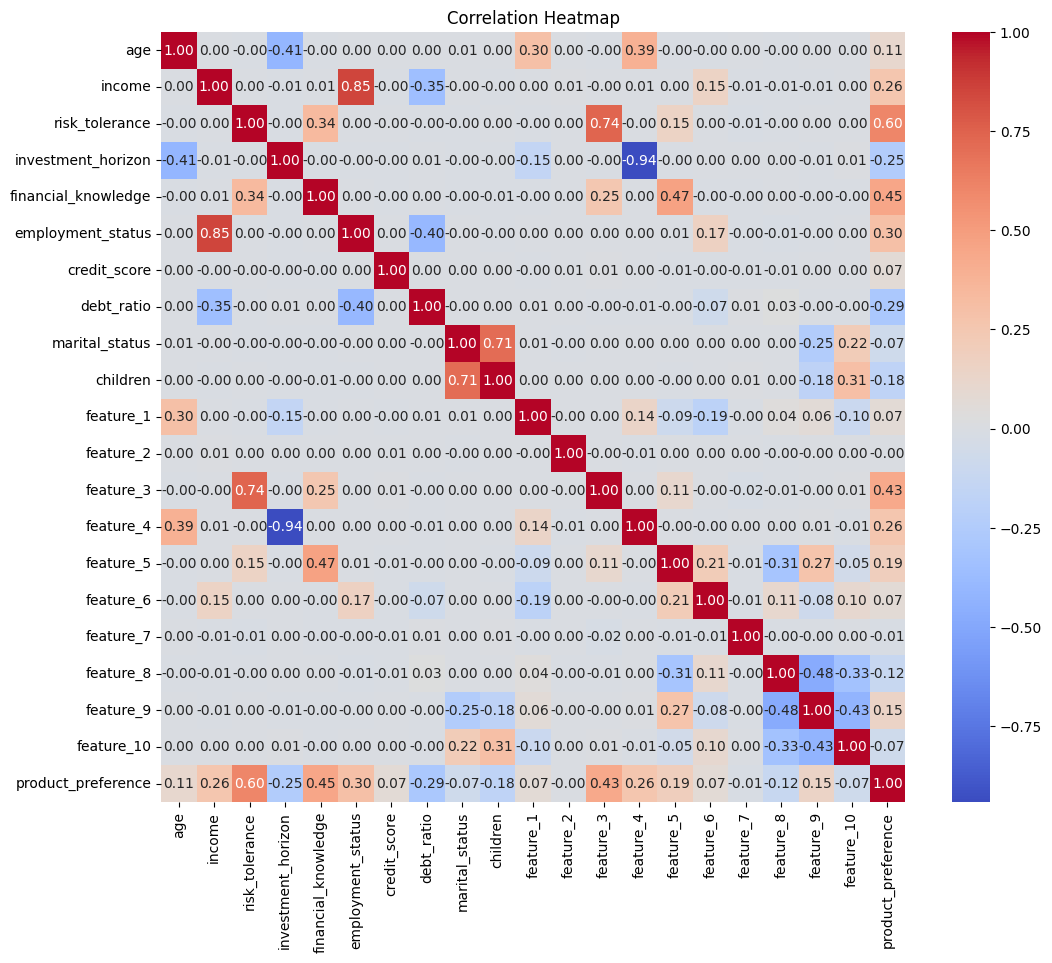

In [12]:
# Get correlation
corr = df.corr()


# Visualize correlations between features and product preference
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

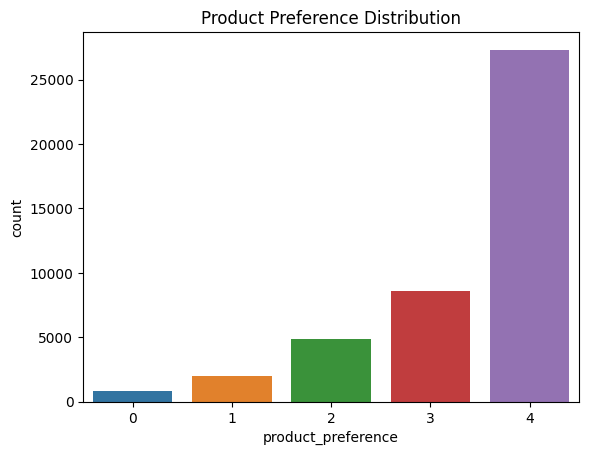

In [13]:
# Visualize product preference distribution
sns.countplot(x="product_preference", data=df)
plt.title("Product Preference Distribution")
plt.show()

### Box Plot
A boxplot, also known as a box and whisker plot, is a type of graph used to display the distribution of a dataset. It is commonly used in statistical analysis to represent the range, interquartile range (IQR), median, and outliers of a dataset.

The box in a boxplot represents the middle 50% of the data (i.e., the IQR) and is depicted by a rectangular shape. The vertical line inside the box indicates the median value. The whiskers (lines extending from the box) represent the minimum and maximum values of the data, excluding any outliers. Outliers are typically displayed as individual data points beyond the whiskers.

Boxplots provide a quick and easy way to visualize the spread and skewness of a dataset, and are particularly useful for comparing multiple datasets side by side.

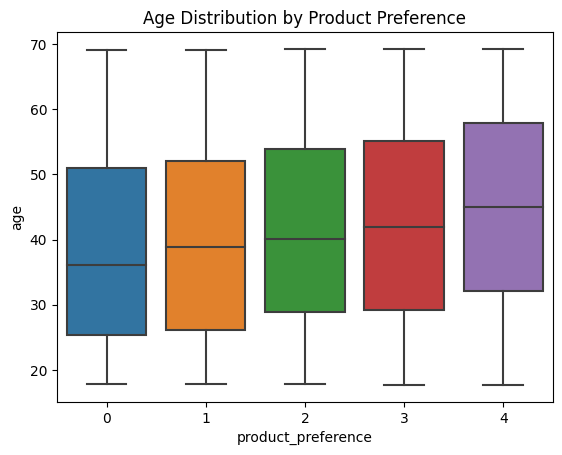

In [14]:
# Visualize age distribution by product preference
sns.boxplot(x="product_preference", y="age", data=df)
plt.title("Age Distribution by Product Preference")
plt.show()

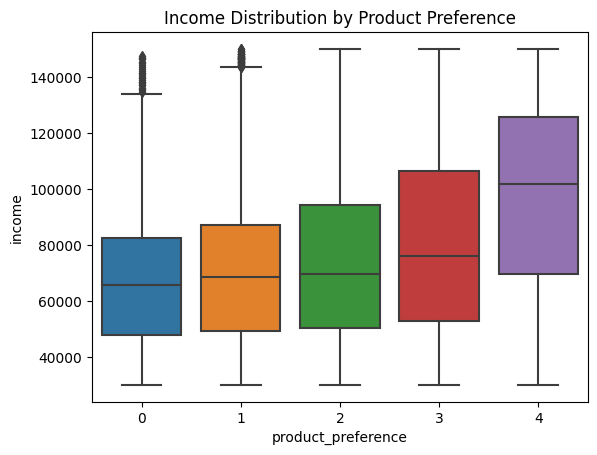

In [15]:
# Visualize income distribution by product preference
sns.boxplot(x="product_preference", y="income", data=df)
plt.title("Income Distribution by Product Preference")
plt.show()

In [18]:
# Split data into features and target
X = df.drop('product_preference', axis=1)
y = df['product_preference']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create and train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

In [23]:
# Make predictions and calculate accuracy
y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8166054203031695

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.48      0.61       178
           1       0.61      0.42      0.50       412
           2       0.61      0.57      0.59       959
           3       0.65      0.63      0.64      1737
           4       0.91      0.96      0.93      5422

    accuracy                           0.82      8708
   macro avg       0.72      0.61      0.65      8708
weighted avg       0.81      0.82      0.81      8708

